# Q学習＋UCBアルゴリズムのリグレットの証明

参考
* [Is Q learning Provably Efficient?](https://arxiv.org/abs/1807.03765)

[前回](UCB_VI_regret_proof.ipynb)では、モデルベースのアルゴリズムのバウンドを導出しました。
今回はモデルフリーのアルゴリズムを考えていきます。つまりQ学習ですね。
今回の導出ではHigh-probability リグレットを考えますが、期待リグレットのは今回の導出について、$\delta$以下で成立するBadイベントを考えます。
面倒なので定数係数は全部$\square$でまとめます。

## Tabular MDP

次の問題設定を考えます。

問題設定

* エピソードの数：$K$
* $k$回目の方策：$\pi^k=\left\{\pi_0^k, \ldots, \pi_{H-1}^k\right\}$
* ホライズン：$H$
* 行動：$a_h \sim \pi_h^k (x_h^k)$
* 遷移確率：$x_{h+1}^k \sim \mathbb{P}_h\left(\cdot \mid x_h^k, a_h^k\right)$
* 遷移先の期待値（$(x, a)=(x_h^k, a_h^k)$でだけ定義されてる）：$\left[\mathbb{P}_h V_{h+1}\right](x, a):=\mathbb{E}_{x^{\prime} \sim \mathbb{P}_h(\cdot \mid x, a)} V_{h+1}\left(x^{\prime}\right)$
* 1サンプルでの遷移の近似：$\left[\hat{\mathbb{P}}_h^k V_{h+1}\right](x, a):=V_{h+1}\left(x_{h+1}^k\right)$
* 状態行動の訪問回数：$t=N_h^k(x, a)=\sum_{i=0}^{k-1} \mathbf{1}\left\{\left(x_h^i, a_h^i\right)=(x, a)\right\}, \forall h, x, a$.
* (擬)リグレット：$\sum_{k=0}^{K-1}\left(V^{\star}\left(s_0\right)-V^{\pi^k}\left(s_0\right)\right)$

### Q学習＋UCB-Hoeffdingの証明

\begin{equation}
\begin{aligned}
& \text { 1: }\text { initialize } Q_h(x, a) \leftarrow H \text { and } N_h(x, a) \leftarrow 0 \text { for all }(x, a, h) \in \mathcal{S} \times \mathcal{A} \times[H]\\
& \text { 2: }\text { for episode } k=1, \ldots, K \text { do } \\
& \text { 3: }\quad \text { receive } x_1 \text {. } \\
& \text { 4: }\quad \text { for step } h=1, \ldots, H \text { do } \\
& \text { 5: }\quad \quad \text{Take action} a_h \leftarrow \operatorname{argmax}_{a^{\prime}} Q_h\left(x_h, a^{\prime}\right),\; \text{ and observe }\; x_{h+1}.\\
& \text { 6: }\quad \quad t=N_h\left(x_h, a_h\right) \leftarrow N_h\left(x_h, a_h\right)+1 ; b_t \leftarrow c \sqrt{H^3 \iota / t} \\
& \text { 7: }\quad \quad Q_h\left(x_h, a_h\right) \leftarrow\left(1-\alpha_t\right) Q_h\left(x_h, a_h\right)+\alpha_t\left[r_h\left(x_h, a_h\right)+V_{h+1}\left(x_{h+1}\right)+b_t\right] \\
& \text { 8: }\quad \quad V_h\left(x_h\right) \leftarrow \min \left\{H, \max _{a^{\prime} \in \mathcal{A}} Q_h\left(x_h, a^{\prime}\right)\right\}
\end{aligned}
\end{equation}

アルゴリズム中では、
* 対数項の定数：$\iota:=\log (S A T / p)$
* ボーナス項：$b_t=c \sqrt{H^3 \iota / t}$

とします。

このアルゴリズムを証明していきます。これは次と等価です。

$$
Q_h^{k+1}(x, a)= \begin{cases}\left(1-\alpha_t\right) Q_h^k(x, a)+\alpha_t\left[r_h(x, a)+V_{h+1}^k\left(x_{h+1}^k\right)+b_t\right] & \text { if }(x, a)=\left(x_h^k, a_h^k\right) \\ Q_h^k(x, a) & \text { otherwise }\end{cases}
$$

ここで、$V_h^k(x) \leftarrow \min \left\{H, \max _{a^{\prime} \in \mathcal{A}} Q_h^k\left(x, a^{\prime}\right)\right\}, \quad \forall x \in \mathcal{S}$です。

また、学習率を$\alpha_t := \frac{H+1}{H+t}$とします。これの直感は論文を参照してください。
さらに関連した記法を導入します。

$$
\alpha_t^0=\prod_{j=1}^t\left(1-\alpha_j\right), \quad \alpha_t^i=\alpha_i \prod_{j=i+1}^t\left(1-\alpha_j\right)\;.
$$

これについて、次が成立しています（証明は論文に任せます）：
* $\frac{1}{\sqrt{t}} \leq \sum_{i=1}^t \frac{\alpha_t^i}{\sqrt{i}} \leq \frac{2}{\sqrt{t}}$ for every $t \geq 1$
* $\max _{i \in[t]} \alpha_t^i \leq \frac{2 H}{t} \text { and } \sum_{i=1}^t\left(\alpha_t^i\right)^2 \leq \frac{2 H}{t} \text { for every } t \geq 1 \text {. }$
* $\sum_{t=i}^{\infty} \alpha_t^i=1+\frac{1}{H}$ for every $i \geq 1$

さっそくこのリグレットの上界を求めていきましょう！

#### 1. 遷移確率の誤差バウンド

どんなときでも遷移確率の誤差のバウンドは大事です。
先に今回導出するバウンドと[前回のモデルベースRL](UCB_VI_regret_proof.ipynb)のバウンドを比較して感覚を掴んでみましょう：

---

* モデルベースRL：$ \left|\widehat{P}_h^k(\cdot \mid s, a)^{\top} V_{h+1}^\star - {P}_h^\star(\cdot \mid s, a)^{\top} V^\star_{h+1}\right|\leq \square H \sqrt{\frac{\ln (SAKH / \delta)}{N_h^k(s, a)}}$
    * $(s, a, s')$の情報が$\widehat{P}_h^k$に$N_h^k(s, a)$個溜まっている。
    * エピソード$k$の推定誤差をバウンドしてる
* モデルフリーRL：$\left|\sum_{i=1}^t \alpha_t^i\left[\left(\hat{\mathbb{P}}_h^{k_i}-\mathbb{P}_h\right) V_{h+1}^{\star}\right](x, a)\right| \leq c \sqrt{\frac{H^3 \iota}{t}}$ where $t=N_h^k(x, a)$
    * $(s, a, s')$の情報が1ステップ分しかたまってない
    * 今までのエピソード$1\sim t$の推定誤差の和をバウンドしている

モデルフリーとモデルベースで「どの範囲でHoeffdingの和を取るか？」を気にするのが大事です。

---

さっそく証明していきましょう。
固定された$(x, a, h)$を考えます。
まず、$(x, a)$を$i$回目に訪れたときのエピソードを$k_i$とします ($i$よりも少ない回数しか訪れていない場合、$k_i=K+1$とします)。
このとき、$k_i$は明らかに停止時刻なので、$\mathcal{F}_i$を$k_i$とステップ$h$までの確率変数に従って生成されたσ代数とします。
このとき、任意の$\tau \in [K]$について、
$$
\left(\mathbb { I } \left[k_i \leq K\right] \left[\left(\hat{\mathbb{P}}_h^{k_i}-\mathbb{P}_h\right) V_{h+1}^{\star}\right](x, a)\right)_{i=1}^\tau
$$
は$\{\mathcal{F}_i\}_{i\geq 0}$に従うマルチンゲールの差の列です。よって、Azuma-Hoeffdingの不等式＋$\tau$についてのUnion Bound＋$\alpha_t^i$に関する不等式から、

$$
\forall \tau \in[K]: \quad\left|\sum_{i=1}^\tau \alpha_\tau^i \cdot \mathbb{I}\left[k_i \leq K\right] \cdot\left[\left(\hat{\mathbb{P}}_h^{k_i}-\mathbb{P}_h\right) V_{h+1}^{\star}\right](x, a)\right| \leq \frac{c H}{2} \sqrt{\sum_{i=1}^\tau\left(\alpha_\tau^i\right)^2 \cdot \iota} \leq c \sqrt{\frac{H^3 \iota}{\tau}},
$$

が確率$1-p /(S A H)$で成立します。

ここで$\tau\in [K]$でUnion Boundを取ったので、確率変数$\tau=t=N_h^k(x, a) \leq K$でもこれは成立します。
また、$i \leq N_h^k(x, a)$については定義より$\mathbb{I}\left[k_i \leq K\right]=1$です。

最後に全部まとめてUnion Boundを取れば、確率$1-p$で

$$
\left|\sum_{i=1}^t \alpha_t^i\left[\left(\hat{\mathbb{P}}_h^{k_i}-\mathbb{P}_h\right) V_{h+1}^{\star}\right](x, a)\right| \leq c \sqrt{\frac{H^3 \iota}{t}} \quad \text { where } t=N_h^k(x, a)
$$

が $(x, a, h, k) \in \mathcal{S} \times \mathcal{A} \times[H] \times[K]$で成り立ちます。

#### 2. $Q_h^\star \leq Q_h^k$のバウンド

UCB系の証明ではほぼ必ずこの"Optimism"の証明が必要になります。
つまり、$0 \leq\left(Q_h^k-Q_h^{\star}\right)(x, a)$を証明しましょう。

まず、$Q_h^\star$と$Q_h^k$については簡単な式変形（$\sum_{i=0}^t \alpha_t^i=1$かつ$\mathbb{P}_h^{k_i} V_{h+1}^\star(s, a) := V_{h+1}^\star (x_{h+1}^{k_i})$に気をつけましょう）で、
* $Q_h^{\star}(x, a)=\alpha_t^0 Q_h^{\star}(x, a)+\sum_{i=1}^t \alpha_t^i\left[r_h(x, a)+\left(\mathbb{P}_h-\hat{\mathbb{P}}_h^{k_i}\right) V_{h+1}^{\star}(x, a)+V_{h+1}^{\star}\left(x_{h+1}^{k_i}\right)\right]$
* $Q_h^k(x, a)=\alpha_t^0 H+\sum_{i=1}^\tau \alpha_t^i\left[r_h(x, a)+V_{h+1}^{k_i}\left(x_{h+1}^{k_i}\right)+b_i\right]$

が成り立っていることがわかります。よって、

$$
\left(Q_h^k-Q_h^{\star}\right)(x, a)=\alpha_t^0\left(H-Q_h^{\star}(x, a)\right)+\sum_{i=1}^t \alpha_t^i\left[\left(V_{h+1}^{k_i}-V_{h+1}^{\star}\right)\left(x_{h+1}^{k_i}\right)+\left[\left(\hat{\mathbb{P}}_h^{k_i}-\mathbb{P}_h\right) V_{h+1}^{\star}\right](x, a)+b_i\right]
$$

がすぐわかります。これに$b_t=\square \sqrt{H^3 \iota / t}$を代入してそれぞれの項を見てみましょう。

* $\alpha_t^0\left(H-Q_h^{\star}(x, a)\right) \geq 0$は明らかです
* $\sum^{t}_{i=1}\alpha_t^i\left[\left(\hat{\mathbb{P}}_h^{k_i}-\mathbb{P}_h\right) V_{h+1}^{\star}\right](x, a) \geq -b_t$が1より成立します。
* $\beta_t := \sum_{i=1}^t \alpha_t^i b_i \in\left[c \sqrt{H^3 \iota / t}, 2 c \sqrt{H^3 \iota / t}\right]$が成立します（$\alpha_t^i$の性質を1のちょっと前に書きましたね）。

以上を合体させると、

$$
\left(Q_h^k-Q_h^{\star}\right)(x, a) \leq \alpha_t^0 H+\sum_{i=1}^t \alpha_t^i\left(V_{h+1}^{k_i}-V_{h+1}^{\star}\right)\left(x_{h+1}^{k_i}\right)+\beta_t
$$

がすぐわかります。また、

* $Q_H^k - Q_H^\star=0\geq 0$
* $Q_{H-1}^k - Q_{H-1}^\star\geq 0$が上の結果と$Q_H^k - Q_H^\star\geq 0$より成立。

同様にして、再帰的に$0 \leq \left(Q_h^k-Q_h^{\star}\right)(x, a)$がわかります。

#### 3. リグレットのバウンド

以下の表記を導入します。

* $\delta_h^k:=\left(V_h^k-V_h^{\pi_k}\right)\left(x_h^k\right) \quad$ 
* $\phi_h^k:=\left(V_h^k-V_h^{\star}\right)\left(x_h^k\right)$

このとき、2.の結果を使うと、

$$
\operatorname{Regret}(K)=\sum_{k=1}^K\left(V_1^{\star}-V_1^{\pi_k}\right)\left(x_1^k\right) \leq \sum_{k=1}^K\left(V_1^k-V_1^{\pi_k}\right)\left(x_1^k\right)=\sum_{k=1}^K \delta_1^k
$$

が成り立っています。モデルベースのときは$\delta_1^k$のバウンドは簡単でしたが、モデルフリーの場合は少し厄介です。
$\sum_{k=1}^K \delta_h^k$を$\sum_{k=1}^K \delta_{h+1}^k$で再帰的にバウンドすることを考えます。

固定された$(k, h) \in[K] \times[H]$を考えましょう。
$\left(x_h^k, a_h^k\right)$を過去のエピソード$k_1, \ldots, k_t<k$のステップ$h$で訪れたと仮定します。
このとき、

$$
\begin{aligned}
\delta_h^k & =\left(V_h^k-V_h^{\pi_k}\right)\left(x_h^k\right) \stackrel{(1)}{\leq}\left(Q_h^k-Q_h^{\pi_k}\right)\left(x_h^k, a_h^k\right) \\
& =\left(Q_h^k-Q_h^{\star}\right)\left(x_h^k, a_h^k\right)+\left(Q_h^{\star}-Q_h^{\pi_k}\right)\left(x_h^k, a_h^k\right) \\
& \stackrel{(2)}{\leq} \alpha_t^0 H+\sum_{i=1}^t \alpha_t^i \phi_{h+1}^{k_i}+\beta_t+\left[\mathbb{P}_h\left(V_{h+1}^{\star}-V_{h+1}^{\pi_k}\right)\right]\left(x_h^k, a_h^k\right) \\
& \stackrel{(3)}{=} \alpha_t^0 H+\sum_{i=1}^t \alpha_t^i \phi_{h+1}^{k_i}+\beta_t-\phi_{h+1}^k+\delta_{h+1}^k+\xi_{h+1}^k,
\end{aligned}
$$

ここで、(1)は$V_h^k\left(x_h^k\right) \leq \max _{a^{\prime} \in \mathcal{A}} Q_h^k\left(x_h^k, a^{\prime}\right)=Q_h^k\left(x_h^k, a_h^k\right)$、(2)は２の結果とベルマン方程式、そして(3)は定義$\delta_{h+1}^k-\phi_{h+1}^k=\left(V_{h+1}^{\star}-V_{h+1}^{\pi_k}\right)\left(x_{h+1}^k\right)$より成立します。
また、$\xi_{h+1}^k:=\left[\left(\mathbb{P}_h-\hat{\mathbb{P}}_h^k\right)\left(V_{h+1}^{\star}-V_{h+1}^k\right)\right]\left(x_h^k, a_h^k\right)$と定義しています。


これを再帰的にして、それぞれの項のバウンドを考えていきましょう。ここからは$n_h^k=N_h^k\left(x_h^k, a_h^k\right)$とします。

* １項目：$\sum_{k=1}^K \alpha_{n_h^k}^0 H=\sum_{k=1}^K H \cdot \mathbb{I}\left[n_h^k=0\right] \leq S A H$ は簡単にわかります。
* ２項目：$\sum_{k=1}^K \sum_{i=1}^{n_h^k} \alpha_{n_h^k}^i \phi_{h+1}^{k_i\left(x_h^k, a_h^k\right)}$ をバウンドします（$k_i\left(x_h^k, a_h^k\right)$は$(x_h^k, a_h^k)$を訪れたエピソードです）。

２項目はちょっと厄介なので丁寧に考えましょう。整理すると,
* $k_i\left(x_h^k, a_h^k\right) \in [K]$：$(x_h^k, a_h^k)$を訪れたエピソード
* $n_h^k=N_h^k\left(x_h^k, a_h^k\right)$：$(x_h^k, a_h^k)$を$0, 1, \dots, k-1$で訪れた回数
* $\phi_{h+1}^{k_i\left(x_h^k, a_h^k\right)}=\left(V_{h+1}^{k_i\left(x_h^k, a_h^k\right)}-V_{h+1}^{\star}\right)\left(x_{h+1}^{k_i\left(x_h^k, a_h^k\right)}\right)$

です。今、$k^\prime \in [K]$について、$\phi_{h+1}^{k^\prime}$を考えてみましょう。$k, k-1, k-2, \dots$と逆向きに遡ったとき、$k > k^\prime$で$\phi_{h+1}^{k^\prime}$が現れるのは、$\left(x_h^{k^{\prime}}, s_h^{k^{\prime}}\right) = \left(x_h^k, s_h^k\right)$となる$k^\prime$のときだけです。
そして、$n_h^k=N_h^k\left(x_h^k, a_h^k\right)$より、現れた時点で$n_h^k$はカウント＋１されています。すなわち、逆向きに遡ると、最初に現れるのは$n_h^k=n_h^{k^{\prime}}+1$のとき、二回目に現れるのは$n_h^k=n_h^{k^{\prime}}+2$のとき、... と続いていきます。

これを使って２項目を並び替えると、

$$
\sum_{k=1}^K \sum_{i=1}^{n_h^k} \alpha_{n_h^k}^i \phi_{h+1}^{k_i\left(x_h^k, a_h^k\right)} \leq \sum_{k^{\prime}=1}^K \phi_{h+1}^{k^{\prime}} \sum_{t=n_h^{k^{\prime}+1}}^{\infty} \alpha_t^{n_h^{k^{\prime}}} \leq\left(1+\frac{1}{H}\right) \sum_{k=1}^K \phi_{h+1}^k,
$$

が出てきます（最後の不等式は$\sum_{t=i}^{\infty} \alpha_t^i=1+\frac{1}{H}$を使っています）。

よって、

$$
\begin{aligned}
\sum_{k=1}^K \delta_h^k & \leq S A H+\left(1+\frac{1}{H}\right) \sum_{k=1}^K \phi_{h+1}^k-\sum_{k=1}^K \phi_{h+1}^k+\sum_{k=1}^K \delta_{h+1}^k+\sum_{k=1}^K\left(\beta_{n_h^k}+\xi_{h+1}^k\right) \\
& \leq S A H+\left(1+\frac{1}{H}\right) \sum_{k=1}^K \delta_{h+1}^k+\sum_{k=1}^K\left(\beta_{n_h^k}+\xi_{h+1}^k\right)
\end{aligned}
$$

が成り立ちます（$V^\star \geq V^{\pi_k}$より、$\phi_{h+1}^k \leq \delta_{h+1}^k$）。
これを$h=1,2, \ldots, H$について再帰的にとれば、

$$
\sum_{k=1}^K \delta_1^k \leq O\left(H^2 S A+\sum_{h=1}^H \sum_{k=1}^K\left(\beta_{n_h^k}+\xi_{h+1}^k\right)\right)
$$

が成り立ちます。


ここで、$\beta_t := \sum_{i=1}^t \alpha_t^i b_i \in\left[c \sqrt{H^3 \iota / t}, 2 c \sqrt{H^3 \iota / t}\right]$であることを思い出すと、

$$
\sum_{k=1}^K \beta_{n_h^k} \leq O(1) \cdot \sum_{k=1}^K \sqrt{\frac{H^3 \iota}{n_h^k}}=O(1) \cdot \sum_{x, a} \sum_{n=1}^{N_h^K(x, a)} \sqrt{\frac{H^3 \iota}{n}}
$$

です。$\sum_{x, a} \sum_{n=1}^{N_h^K(x, a)} \sqrt{\frac{H^3 \iota}{n}}$はいつ最大になるでしょうか？全ての$(x, a)$で$N_h^K(x, a)$が小さければ良さそうです。また、$\sum_{x, a} N_h^K(x, a)=K$という縛りも課されていることに気をつけましょう。
このような場合、鳩の巣原理を考えると、これが最大になるのは$N_h^K(x, a)=K / S A$のときです。よって、

$$
O(1) \cdot \sum_{x, a} \sum_{n=1}^{N_h^K(x, a)} \sqrt{\frac{H^3 \iota}{n}}\leq
O\left(\sqrt{H^3 S A K \iota}\right)=O\left(\sqrt{H^2 S A T \iota}\right)
$$

が成り立ちます。

最後に、Azuma-Hoeffdingを使えば

$$
\left|\sum_{h=1}^H \sum_{k=1}^K \xi_{h+1}^k\right|=\left|\sum_{h=1}^H \sum_{k=1}^K\left[\left(\mathbb{P}_h-\hat{\mathbb{P}}_h^k\right)\left(V_{h+1}^{\star}-V_{h+1}^k\right)\right]\left(x_h^k, a_h^k\right)\right| \leq c H \sqrt{T \iota} .
$$

は簡単に導出できます。
よって、全部まとめると

$$
\sum_{k=1}^K \delta_1^k \leq O\left(H^2 S A+\sqrt{H^4 S A T \iota}\right)
$$

になります。

これで証明完成です！
Pythonで実験しましょう。[Double Chain MDP](reward_free_RL.ipynb.ipynb)

In [6]:
import numpy as np
from functools import partial
from typing import Optional, NamedTuple
import jax.numpy as jnp

def create_rew_P(S: int, A: int):
    """ double_chain MDP (報酬関数, 遷移確率) を作成します
    詳しくは６章参照

    Args:
        S (int): 状態空間のサイズ
        A (int): 行動空間のサイズ

    Returns:
        rew (float): 報酬関数
        P (float): 遷移確率
    """
    assert A == 2

    # 一番右側の状態で1がもらえます
    rew = np.zeros((S, 2))
    rew[-1] = 1.0

    # 1を選ぶと右に, 0を選ぶと左に動きます。0.1の確率で逆方向に動きます。
    P = np.zeros((S, A, S))
    for s in range(S):
        P[s, 0, max(0, s-1)] = 0.9 
        P[s, 0, min(s+1, S-1)] = 0.1 

        P[s, 1, max(0, s-1)] = 0.1 
        P[s, 1, min(s+1, S-1)] = 0.9 
    np.testing.assert_almost_equal(P.sum(axis=-1), 1)
    return jnp.array(rew), jnp.array(P)


class MDP(NamedTuple):
    S_array: np.array  # 状態空間
    A_array: np.array  # 行動空間
    gamma: float  # 割引率
    horizon: int  # ホライゾン
    rew: float  # 報酬関数
    P: float  # 遷移確率
    optimal_Q: Optional[np.ndarray] = None  # 最適Q値
    optimal_Q_idx: Optional[np.ndarray] = None  # 後でplot用に使います

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_array)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_array)


S = 30
A = 2
S_array = np.arange(S)
A_array = np.arange(A)
gamma = 1.0
horizon = 20

# Double chain MDP を作ります
rew, P = create_rew_P(S, A)
double_chain = MDP(S_array, A_array, gamma, horizon, rew, P)

# 実験に便利な関数

実験の前に、いくつか便利な関数を導入します。
（全て有限MDP用に調整してあります）

1. ``compute_greedy_policy``: Q関数 ($[H] \times S \times A \to \mathcal{R}$) の貪欲方策を返します
2. ``compute_optimal_Q``: MDPの時刻０での最適Q関数 $q_* : \times S \times A \to \mathcal{R}$ を返します。
3. ``compute_policy_Q``: 方策 $\pi$ の時刻０でのQ関数 $q_\pi : S \times A \to \mathcal{R}$ を返します。
5. ``sample_next_state``: $(s, a)$の次の状態をサンプルします。
6. ``sample_eps_greedy_act``: 与えられたQ値から、epsilon-greedy方策に従って行動を返します

In [37]:
from functools import partial
import jax
from tqdm import tqdm
import random


# >>>> 1 >>>>
@jax.jit
def compute_greedy_policy(Q: np.ndarray):
    greedy_policy = jnp.zeros_like(Q)
    H, S, A = Q.shape
    
    def body_fn(i, greedy_policy):
        greedy_policy = greedy_policy.at[i, jnp.arange(S), Q[i].argmax(axis=-1)].set(1)
        return greedy_policy

    greedy_policy = jax.lax.fori_loop(0, H, body_fn, greedy_policy)
    assert greedy_policy.shape == (H, S, A)
    return greedy_policy
# <<<< 1 <<<<


# >>>> 2 >>>>
@partial(jax.jit, static_argnames=("H", "S", "A"))
def _compute_optimal_Q(mdp: MDP, H: int, S: int, A: int):

    def backup(i, optimal_Q):
        h = H - i - 1
        max_Q = optimal_Q[h].max(axis=1)
        next_v = mdp.P @ max_Q
        assert next_v.shape == (S, A)
        optimal_Q = optimal_Q.at[h-1].set(mdp.rew + mdp.gamma * next_v)
        return optimal_Q
    
    optimal_Q = jnp.zeros((H, S, A))
    return jax.lax.fori_loop(0, mdp.horizon, backup, optimal_Q)

compute_optimal_Q = lambda mdp: _compute_optimal_Q(mdp, mdp.horizon, mdp.S, mdp.A)
# <<<< 2 <<<<


# >>>> 3 >>>>
@jax.jit
def compute_policy_Q(mdp: MDP, policy: np.ndarray):
    H, S, A = policy.shape

    def backup(i, policy_Q):
        h = H - i - 1
        max_Q = (policy[h] * policy_Q[h]).sum(axis=1)
        next_v = mdp.P @ max_Q
        assert next_v.shape == (S, A)
        policy_Q = policy_Q.at[h-1].set(mdp.rew + mdp.gamma * next_v)
        return policy_Q
    
    policy_Q = jnp.zeros((H, S, A))
    return jax.lax.fori_loop(0, mdp.horizon, backup, policy_Q)
# <<<< 3 <<<<


# >>>> 4 >>>>
def sample_next_state(mdp: MDP, s: int, a: int):
    """ sample next state according to the transition matrix P
    Args:
        mdp: MDP
        s: int
        a: int
    Returns:
        next_s: int
    """
    probs = np.array(mdp.P[s, a])
    return np.random.choice(mdp.S_array, p=probs)
# <<<< 4 <<<<


# >>>> 5 >>>>
def sample_eps_greedy_act(mdp: MDP, q_s: np.array, eps: float):
    if random.random() < eps:
        return random.randint(0, mdp.A-1)
    else:
        return q_s.argmax()
# <<<< 5 <<<<

double_chain = double_chain._replace(optimal_Q=compute_optimal_Q(double_chain))
optimal_policy = compute_greedy_policy(double_chain.optimal_Q)
optimal_policy_Q = compute_policy_Q(double_chain, optimal_policy)

assert np.all(double_chain.optimal_Q == optimal_policy_Q)

In [61]:
import matplotlib.pyplot as plt

 
def RandomQ_learning(mdp: MDP, K: int):
    S, A, H = mdp.S, mdp.A, mdp.horizon
    visit_SA = np.zeros((H, S, A))
    Q_table = np.ones((H, S, A)) * H

    init_s = int((mdp.S - 1) / 2)
    optimal_V = mdp.optimal_Q[0, init_s].max()
    regrets = []
    regret = 0

    for k in tqdm(range(K)):
        s = init_s

        # 探索をします　
        for h in range(H):
            a = np.random.randint(A)
            visit_SA[h, s, a] += 1
            r = mdp.rew[s, a]
            next_s = sample_next_state(mdp, s, a)

            # Q 値を更新します
            if h == H-1:
                next_Q = 0
            else:
                next_Q = min(Q_table[h+1, next_s].max(), H)
            targ_q = r + mdp.gamma * next_Q

            lr = (H + 1) / (H + visit_SA[h, s, a])
            Q_table[h, s, a] = lr * targ_q + (1 - lr) * Q_table[h, s, a]
            s = next_s

        # リグレットを計算します
        policy = compute_greedy_policy(Q_table)
        policy_Q = compute_policy_Q(mdp, policy)
        policy_V = policy_Q[0, init_s].max()
        regret += optimal_V - policy_V
        regrets.append(regret)

    return regrets, visit_SA


def UCB_H_Q_learning(mdp: MDP, K: int, delta: float):
    S, A, H = mdp.S, mdp.A, mdp.horizon
    L = np.log(S*A*H*K / delta)
    Q_table = np.ones((H, S, A)) * H

    init_s = int((mdp.S - 1) / 2)
    visit_SA = np.zeros((H, S, A))
    optimal_V = mdp.optimal_Q[0, init_s].max()
    regrets = []
    regret = 0

    for k in tqdm(range(K)):
        s = init_s

        # 探索をします　
        for h in range(H):
            a = np.argmax(Q_table[h, s])
            visit_SA[h, s, a] += 1
            r = mdp.rew[s, a]
            next_s = sample_next_state(mdp, s, a)

            # Q 値を更新します
            if h == H-1:
                next_Q = 0
            else:
                next_Q = min(Q_table[h+1, next_s].max(), H)

            # 0.1はbonusが大きくなりすぎるのを防ぐためです。
            bonus = 0.01 * np.sqrt(H ** 3 * L / visit_SA[h, s, a])
            targ_q = bonus + r + mdp.gamma * next_Q
            lr = (H + 1) / (H + visit_SA[h, s, a])
            Q_table[h, s, a] = lr * targ_q + (1 - lr) * Q_table[h, s, a]
            s = next_s

        # リグレットを計算します
        policy = compute_greedy_policy(Q_table)
        policy_Q = compute_policy_Q(mdp, policy)
        policy_V = policy_Q[0, init_s].max()
        regret += optimal_V - policy_V
        regrets.append(regret)

    return regrets, visit_SA


K = 10000
delta = 0.01
random_regrets, random_visit_SA = RandomQ_learning(double_chain, K)
ucb_h_regrets, ucb_visit_SA = UCB_H_Q_learning(double_chain, K, delta)

100%|██████████| 10000/10000 [02:28<00:00, 67.54it/s]


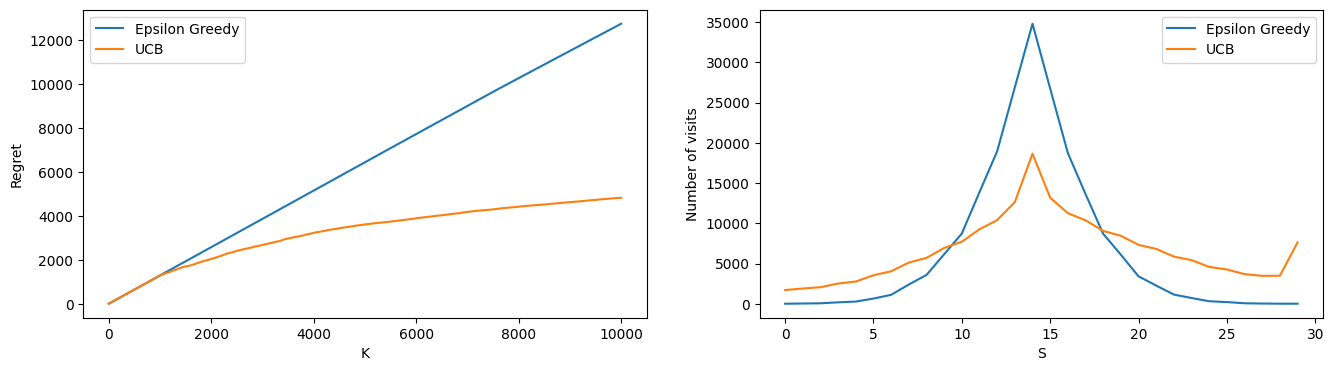

In [62]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(random_regrets, label="Random")
plt.plot(ucb_h_regrets, label="UCB")
plt.ylabel("Regret")
plt.xlabel("K")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(random_visit_SA.sum(axis=(0, 2)), label="Epsilon Greedy")
plt.plot(ucb_visit_SA.sum(axis=(0, 2)), label="UCB")
plt.ylabel("Number of visits")
plt.xlabel("S")
plt.legend()